# INDEPENDENT PROJECT 2 - KARAMOJA FOOD SECURITY PROJECT

## Introduction

The Karamoja Food security dataset was developed to assist NGOs in making informed decisions. This tool visualizes 2017 crop yields ans population data mainly in Karamoja. It offers interactive data visualizations for a food security monitoring tool. it also offers comprehensive data and analyses important to the understanding of socio-econimic and food security in the region.

### MAIN OBJECTIVE
To assess and enhance food security in Karamoja region by analyzing crop yield, land use and population distribution to inform policy decisions and sustainable agricultural practices.

### Specific objectives
In order to achieve the main objectives, one has to achieve a number of tasks in the form of specific objectives;
* Spatial analysis of crop distribution
* Yield assessment
* Food Security Analysis
* Population and food availability correlation
* Policy and Intervention recommendations

## Data loading
The dataset used from the Karamoja food security project contains a number of files of various contents and use. The two main categories of data therein are shapefiles ans tables for different purposes.
Start by loading the libraries and the data into the notebook.

In [29]:
pip install pandas geopandas matplotlib seaborn folium


   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/110.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/110.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/110.5 kB ? eta -:--:--
   -------------- ------------------------ 41.0/110.5 kB 219.4 kB/s eta 0:00:01
   --------------------- ----------------- 61.4/110.5 kB 297.7 kB/s eta 0:00:01
   -------------------------------------- 110.5/110.5 kB 428.5 kB/s eta 0:00:00


In [2]:
# loading the libraries into the notebook
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
! dir

 Volume in drive C has no label.
 Volume Serial Number is AE01-BF8C

 Directory of C:\Users\pc\Documents\Flatiron\dsc-dvp-project02

02/07/2025  01:29 PM    <DIR>          .
02/07/2025  01:29 PM    <DIR>          ..
02/07/2025  11:12 AM    <DIR>          .ipynb_checkpoints
02/07/2025  01:27 PM    <DIR>          DATA
02/07/2025  11:09 AM             1,689 index.ipynb
02/07/2025  11:09 AM               835 README.md
02/07/2025  01:29 PM            52,946 Untitled.ipynb
               3 File(s)         55,470 bytes
               4 Dir(s)  78,292,688,896 bytes free


In [9]:
# Loading Shapefiles data into notebook
# first load administrative boundaries
districts = gpd.read_file("DATA/SHAPEFILES/Uganda_Districts.shp")
subcounties = gpd.read_file("DATA/SHAPEFILES/Uganda_Subcounties.shp")
# then Load crop distribution maps
sorghum_fields = gpd.read_file("DATA/SHAPEFILES/Crop_Type_Map_Sorghum.shp")
maize_fields = gpd.read_file("DATA/SHAPEFILES/Crop_Type_Map_Maize.shp")

In [11]:
# Loading Tabular data into the notebook
# Load crop yield and population data
df_yield_population_District = pd.read_csv("DATA/TABLES/Uganda_Karamoja_District_Crop_Yield_Population.csv")
df_yield_population_District.head()

,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468


In [12]:
df_yield_population_sub = pd.read_csv("DATA/TABLES/Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv")
df_yield_population_sub.head()

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400


## Data cleaning and summary statistics 

In [13]:
#check for missing values in the data first
df_yield_population_District.isnull().sum()

OBJECTID        0
NAME            0
POP             0
Area            0
S_Yield_Ha      0
M_Yield_Ha      0
Crop_Area_Ha    0
S_Area_Ha       0
M_Area_Ha       0
S_Prod_Tot      0
M_Prod_Tot      0
dtype: int64

In [14]:
df_yield_population_sub.isnull().sum()

OBJECTID          0
SUBCOUNTY_NAME    0
DISTRICT_NAME     0
POP               0
Area              0
Karamoja          0
S_Yield_Ha        0
M_Yield_Ha        0
Crop_Area_Ha      0
S_Area_Ha         0
M_Area_Ha         0
S_Prod_Tot        0
M_Prod_Tot        0
dtype: int64

In [15]:
# summary statistics
df_yield_population_District.describe()

,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
count,7.000000,7.000000,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000e+00,7.000000e+00
mean,61.714286,214943.571429,3.960853e+09,269.285714,986.142857,21094.520379,16737.636651,3983.947082,4.873098e+06,4.085632e+06
std,36.481567,188604.280916,1.781860e+09,119.243049,321.566700,17363.854165,16625.963460,2678.911441,5.743724e+06,2.877188e+06
min,5.000000,90385.000000,1.643583e+09,128.000000,355.000000,5470.068394,2973.423860,1190.050606,6.069440e+05,4.224680e+05
25%,37.000000,114800.500000,3.171069e+09,171.000000,899.500000,5860.128883,4009.522373,1799.997070,1.040529e+06,1.966571e+06
50%,80.000000,146780.000000,3.641540e+09,279.000000,1040.000000,22944.296020,16142.015880,2733.661014,2.211456e+06,3.545558e+06
75%,88.500000,205391.000000,4.362553e+09,343.500000,1206.000000,27247.185510,19890.764085,6484.753740,6.290160e+06,6.288030e+06
max,96.000000,627057.000000,7.373606e+09,449.000000,1297.000000,53032.649450,50247.443900,7394.416334,1.663190e+07,8.122197e+06


In [16]:
df_yield_population_sub.describe()

,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
count,52.000000,52.000000,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000,5.200000e+01,5.200000e+01
mean,787.865385,28934.692308,5.331913e+08,274.165405,940.259552,2839.646974,2253.143395,536.300569,6.557443e+05,5.500730e+05
std,280.101314,20865.122974,4.913308e+08,118.569907,321.641901,3110.505917,2954.355858,724.092288,9.915839e+05,7.939707e+05
min,263.000000,1418.000000,2.121209e+06,108.156411,0.000000,0.171390,0.130941,0.000000,1.728126e+01,0.000000e+00
25%,597.750000,16558.500000,1.568923e+08,173.034066,743.075879,964.876031,405.394759,79.821743,1.210555e+05,6.087012e+04
50%,810.500000,23053.500000,3.848356e+08,277.255206,1016.684002,1654.265138,1231.824456,326.479336,2.543687e+05,2.896239e+05
75%,982.250000,39461.000000,7.749029e+08,368.246437,1203.548665,3267.564651,2429.985069,740.296675,6.040942e+05,8.114574e+05
max,1320.000000,100919.000000,2.069555e+09,560.313070,1396.991494,13587.990760,12964.499730,3840.698081,4.582294e+06,4.365058e+06


## Exploratory Data Analysis

After finding the cummulative summary of the data, explore the data further to find the correlation between its variables to achieve the various specific objectives and the main objective to gather data for finding the recommendation.

## 1) Population vs Food Production scatter plot

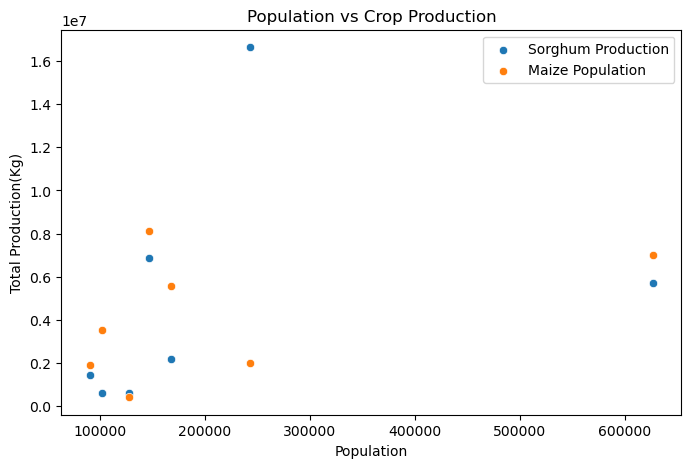

In [42]:
# find the correlation between Population and Food Production
# plot a scatter plot for the districts to see this correlation 
plt.figure(figsize=(8, 5))
sns.scatterplot(data= df_yield_population_District, x= "POP", y= "S_Prod_Tot", label= "Sorghum Production")
sns.scatterplot(data= df_yield_population_District, x= "POP" , y= "M_Prod_Tot", label= "Maize Population")
plt.xlabel("Population")
plt.ylabel("Total Production(Kg)")
plt.title("Population vs Crop Production")
plt.legend()
plt.show()           

Based on the above visualization, we can conclude that:
* The production of maize and sorghum are compatible in most areas 
* The production of maize and sorghum is mainly popular in lowly populated areas compared to highly populated ones
* The total yield of both maize and sorghum per kg is very low in the region meaning it might be for domestic use rather that commercial.

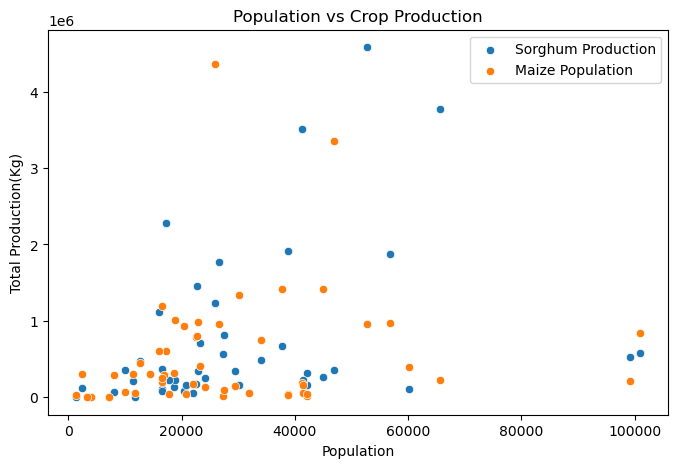

In [43]:
# find the correlation between Population and Food Production
# plot a scatter plot for the subcounties to see this correlation 
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_yield_population_sub, x= "POP", y= "S_Prod_Tot", label= "Sorghum Production")
sns.scatterplot(data= df_yield_population_sub, x= "POP" , y= "M_Prod_Tot", label= "Maize Population")
plt.xlabel("Population")
plt.ylabel("Total Production(Kg)")
plt.title("Population vs Crop Production")
plt.legend()
plt.show()
           

Based on the above visualization showing production at a subcounty level, the following can be concluded:
* The production of maize and sorghum also goes hand in hand in most areas
* the production of maize and sorghumis mainly on a low scale level
* the roduction is generally low in most subcounties compared to others.
* the production is mainly concentrated on less populated areas

## 2) Food Security Analysis
In order to determine the food security in the area, one needs to evaluate the food availability per capita in the various districts and subcounties in the Karamoja region.


In [51]:
# Compute the food availability per District
df_yield_population_District["S"] = df_yield_population_District["S_Prod_Tot"]/df_yield_population_District["POP"]
df_yield_population_District["M"] = df_yield_population_District["M_Prod_Tot"]/df_yield_population_District["POP"]
# identify the food deficit areas
food_deficit = [df_yield_population_District["S"]< 100]
# display the deficit districts
print(food_deficit)

[0    True
1    True
2    True
3    True
4    True
5    True
6    True
Name: S, dtype: bool]


According to the above generated summary:
* There is definite food deficit on a district level in the region
* This means that less food is generally produced enough to feed the entire population in the various districts.

In [37]:
# Compute the food availability per subcounty
df_yield_population_sub["S"] = df_yield_population_sub["S_Prod_Tot"]/df_yield_population_District["POP"]
df_yield_population_sub["M"] = df_yield_population_sub["M_Prod_Tot"]/df_yield_population_District["POP"]
# identify the food deficit areas
food_deficit = [df_yield_population_sub["S"]< 100]
# display the deficit districts
print(food_deficit)

[0      True
1      True
2      True
3      True
4      True
5      True
6      True
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
Name: S, dtype: bool]


According to the summary above we can conclude that:
* On a subcounty level, the food deficit is not as severe as in the district level
* This means that only a few subcounties do not produce enough food to feed its population. 

## 3) Yield assessment
This is done to find out the yield distribution of crop in the region. it will be done using a bar graph for the district and subcounties. 

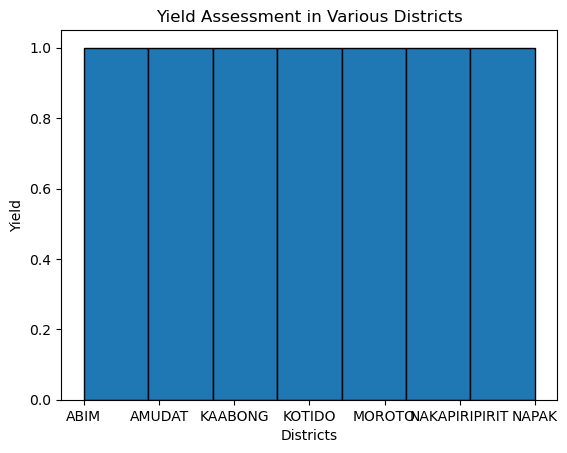

In [57]:
# create a bar chart
yields = ["S_Yield_Ha", "M_Yield_Ha"]
districts = df_yield_population_District["NAME"]
x = districts
plt.hist(x, bins = len(districts) , edgecolor= "black")

# add the title and labels
plt.title("Yield Assessment in Various Districts")
plt.xlabel("Districts")
plt.ylabel("Yield")
plt.show()

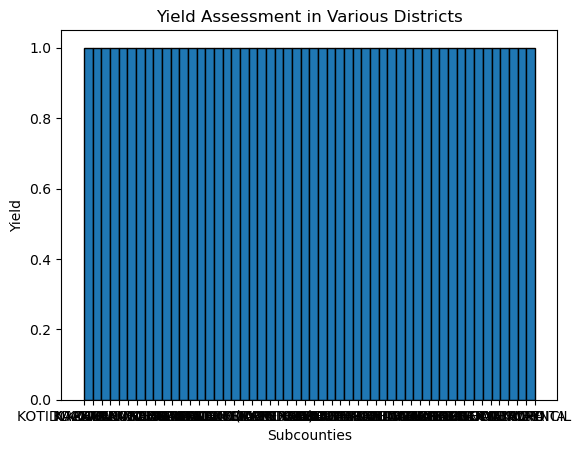

In [58]:
# create a bar chart
yields = ["S_Yield_Ha", "M_Yield_Ha"]
subcounties = df_yield_population_sub["SUBCOUNTY_NAME"]
x = subcounties
plt.hist(x, bins = len(subcounties) , edgecolor= "black")

# add the title and labels
plt.title("Yield Assessment in Various Districts")
plt.xlabel("Subcounties")
plt.ylabel("Yield")
plt.show()

## Conclusion
Based on the analysis of crop yield, food production and population distribution, several conclusions can be drawn:
* crop production varies significantly across various subcounties and districts.
* the food availability per capita is not evenly distributed
* highly populated areas tend to face food shortages if the crop yields are low

## Recommendations

Based on the above findings, several recommendations can be provided to manage the food deficit in the several destricts and subcounties such as:
* Enhancing sorghum and maize yield in the low yield subcounties by enabling the farmers through farming programmes, providing fertilizers and introducing modern farming techniques. 
* Offering targeted food aids in deficit areas and incentives to farmers in those areas.
* Investing in irrigation in the low yield areas to improve resilience to drought incase its one of the factors.
* improve storage and transportation in the area to allow and improve market access to food and equipments.

Tableau dashboard url: on the read me file